# Data Science Aplicada à Área da Saúde

## Mini-Projeto - Prevendo a Ocorrência de Crises Epiléticas

Projeto de análise de dados da formação FIAMED da [DSA](https://www.datascienceacademy.com.br/)

## Etapa 1 - Definição do problema

A epilepsia é um distúrbio do sistema nervoso central (SNC), afetando cerca de 1,2% (3,4 milhões de pessoas) nos EUA e mais de 65 milhões em todo o mundo. Além disso, cerca de 1 em cada 26 pessoas desenvolverá epilepsia em algum momento da vida. Existem muitos tipos de convulsões, cada uma com sintomas diferentes, como perda de consciência, movimentos bruscos ou confusão. 

Algumas convulsões são muito mais difíceis de detectar visualmente, os pacientes geralmente apresentam sintomas como não responder ou olhar sem expressão por um breve período de tempo. As convulsões podem ocorrer inesperadamente e podem resultar em lesões como queda, mordedura da língua ou perda do controle da urina ou fezes. Portanto, essas são algumas das razões pelas quais a detecção de convulsões é de extrema importância para pacientes sob supervisão médica que se suspeitem estar propensos a convulsões.

Este projeto usará métodos de classificação binária para prever se um indivíduo está tendo uma convulsão em algum momento.

### Objetivo 

Prever se um paciente está tendo uma convulsão ou não através de 178 leituras de EEG (Eletroencefalograma) por segundo.

### Método de avaliacão

Como métrica de avaliação do modelo usaremos a AUC Score (Area Under The Curve Score), cujo valor vai de 1 a 100% e para esse problema o valor da métrica deve ser aproximadamente de 99%, uma vez que a previsão do modelo está relacionada a casos de vida ou morte. Usaremos a métrica calculada no dataset de validação.

## Etapa 2 - Compreensão dos Dados

O conjunto de dados está disponível no repositório de aprendizado de máquina da UCI.

https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

O conjunto de dados inclui 4097 leituras de eletroencefalograma (EEG) por paciente durante 23,5 segundos, com 500 pacientes no total. Os 4097 pontos de dados foram então divididos igualmente em 23 partes por paciente, cada parte é convertida em uma linha no conjunto de dados. Cada linha contém 178 leituras, que são transformadas em colunas; em outras palavras, existem 178 colunas que compõem um segundo das leituras de EEG. No total, existem 11.500 linhas e 179 colunas com a última coluna contendo o status do paciente, esteja ele tendo uma convulsão ou não.

### Anánlise exploratória

In [1]:
# Carregando dados
import pandas as pd
dataset = pd.read_csv("dados/dados_originais.csv")

In [2]:
# Visualizado alguns registros
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


Vamos criar uma coluna chamada LABEL_VARIAVEL_TARGET em que 1 é quando um paciente está tendo uma convulsão e 0 é quando um paciente não está tendo uma convulsão.

Na última coluna, somente o valor 1 representa convulsão. Os demais valores não representam convulsão.

In [3]:
# Colocando True onde o valor for igual a 1 e False onde o valor for diferente
dataset['target'] = dataset.y == 1

In [4]:
# Visualizando alguns registros
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,target
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,False
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,True
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,False
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,False
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,False


In [5]:
# Tranformar a variável target em valor numérico
dataset['target'] = dataset['target'].astype(int)

In [6]:
# Visualizando alguns registros
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,target
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,0


In [7]:
# Retirar a feature y [método pop exclui e prita o que está sendo excluido]
dataset.pop('y')

0        4
1        1
2        5
3        5
4        5
        ..
11495    2
11496    1
11497    5
11498    3
11499    4
Name: y, Length: 11500, dtype: int64

In [8]:
# Visualizando alguns registros
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [9]:
# Excluir a coluna de identificação
dataset = dataset.drop(dataset.columns[0], axis=1)

In [10]:
# Visualizando alguns registros
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [11]:
# Número de features
print(f'Número de features: {dataset.shape[1]-1}')

Número de features: 178


O conjunto de dados tem apenas um recurso exclusivo, e essas são as leituras de EEG. As colunas são divididas para capturar a leitura do EEG em um ponto no tempo e todos os pontos no tempo (todas as 178 colunas) existem no mesmo segundo. 

### Calcular a prevalência da classe positiva

A prevalência é a porcentagem de suas amostras que tem a característica que você está tentando prever. Nesse cenário específico, significa que as pessoas que têm uma convulsão são positivas, enquanto as que não sofrem são negativas. A taxa é calculada por (número de amostras positivas / número de amostras). Portanto, uma taxa de prevalência de 0,2 significa que 20% de nossa amostra está tendo uma convulsão naquele momento.

In [12]:
prev = dataset['target'].mean()
print(f'Prevalência de ataques epiléticos: {prev} ({prev*100:.0f}%)')

Prevalência de ataques epiléticos: 0.2 (20%)


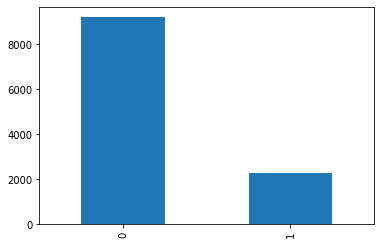

In [13]:
dataset['target'].value_counts().plot(kind='bar');

## Etapa 3 - Preparação dos dados

Nesta etapa realizamos o processamento de recursos que são categóricos ou ordinais em variáveis numéricas legíveis para o nosso algoritmo de aprendizado de máquina. Por exemplo, variáveis categóricas podem ser processadas com codificação one-hot, ou variáveis ordinais podem ser processadas com codificação de rótulo, para que nosso algoritmo de aprendizado de máquina possa entendê-las.

Para o conjunto de dados da epilepsia, existem 178 recursos (colunas), no entanto, uma vez que cada coluna representa um ponto de dados em um ponto específico no tempo e são todas as leituras de EEG, não há necessidade de realizar transformação adicional.

In [14]:
# Preparando o dataset somente com os dados de interesse
collist = dataset.columns.tolist()
cols_input = collist[0:178]
df_data = dataset[cols_input + ['target']]

In [15]:
df_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [16]:
# Checando se temos colunas duplicadas nos dados de entrada
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, 'você duplicou colunas em df_data'

set()


In [17]:
# Checando se temos colunas duplicadas no dataset final
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, 'você duplicou colunas em df_data'

set()


## Etapa 4 - Modelagem

### Divisão dos dados em treino, validação e teste

Geralmente, podemos dividir o conjunto de dados em 50/25/25, 60/20/20, 70/15/15 como a divisão para amostras de treinamento / validação / teste; isso também depende de quantas amostras temos. Se tivermos um conjunto de dados extremamente grande (centenas de milhões de linhas), podemos usar uma divisão como 98/1/1. 

A divisão de treinamento é usada para treinar nosso algoritmo de aprendizado de máquina, por isso queremos usar a maioria de nosso conjunto de dados. O conjunto de dados de validação é usado para ajustar os hiperparâmetros e selecionar a abordagem de melhor desempenho. O conjunto de dados de teste é usado para testar a precisão do nosso modelo de aprendizado de máquina.

In [18]:
# Gerando amostras aleatórias dos dados
df_data = df_data.sample(n=len(df_data))

# Ajustando os índices do dataset
df_data = df_data.reset_index(drop=True)

In [19]:
# Gera um índice para a divisão 
df_valid_teste = df_data.sample(frac=0.3)
tamanho = len(df_valid_teste)/len(df_data)
print(f'Tamanho da divisão de validação / teste: {tamanho}')

Tamanho da divisão de validação / teste: 0.3


In [20]:
# Fazendo a divisão
## Dados de teste
df_teste = df_valid_teste.sample(frac=0.5)

## Dados de validação
df_valid = df_valid_teste.drop(df_teste.index)

## Dados de treino
df_treino = df_data.drop(df_valid_teste.index)

In [21]:
# Verificar o split do dataset e a prevalência
## Frequência e proporção
treino = df_treino.shape[0]
valid = df_valid.shape[0]
teste = df_teste.shape[0]
total = treino + valid + teste

## Prevalência
prev_treino = df_treino.target.mean()
prev_valid = df_valid.target.mean()
prev_teste = df_teste.target.mean()

print('Dataset\tfreq\tProp\tPrevalência')
print('-'*38)
print(f'Treino\t{treino}\t{treino/total}\t{prev_treino:^10.2f}')
print(f'Valid\t{valid}\t{valid/total}\t{prev_valid:^10.2f}')
print(f'Teste\t{teste}\t{teste/total}\t{prev_teste:^10.2f}')

Dataset	freq	Prop	Prevalência
--------------------------------------
Treino	8050	0.7	   0.20   
Valid	1725	0.15	   0.20   
Teste	1725	0.15	   0.21   


### Balanceamento do conjunto de dados

Queremos equilibrar nosso conjunto de dados para evitar a criação de um modelo em que ele classifique incorretamente as amostras como pertencentes à classe majoritária. Por exemplo, se tivermos um conjunto de dados de detecção de fraude e a maioria dos casos for "Não é fraude", o modelo de classificação binária tenderia a favorecer a classe "Não é fraude", o que leva a resultados enganosos.

Equilibramos nosso conjunto de dados para que as proporções de cada classe sejam as mesmas para evitar a criação de um modelo "burro".

Como temos 2300 amostras positivas, podemos usar o método de balanceamento de subamostras para usar apenas um subconjunto aleatório das amostras negativas.

In [22]:
# Importar pacote
import numpy as np

# Cria um índice
rows_pos = df_treino.target == 1

# Define valores positivos e negativos do índice
df_train_pos = df_treino.loc[rows_pos]
df_train_neg = df_treino.loc[~rows_pos]

# Valor mínimo
n = np.min([len(df_train_pos), len(df_train_neg)])

# Obtém vslores aleatórios para o dataset de treino
df_treino_final = pd.concat([df_train_pos.sample(n=n, random_state=69),
                             df_train_neg.sample(n=n, random_state=69)],
                            axis=0,
                            ignore_index=True)

df_treino_final = df_treino_final.sample(n=len(df_treino_final),
                                        random_state=69).reset_index(drop=True)

print(f'Balanceamento em Treino(n = {len(df_treino_final)}): {df_treino_final.target.mean()}')

Balanceamento em Treino(n = 3168): 0.5


### Salvar os datasets até agora

In [23]:
# Salvamos todos os datasets em disco no formato csv.
df_treino.to_csv('dados/dados_treino.csv',index=False)
df_treino_final.to_csv('dados/dados_treino_final.csv',index=False)
df_valid.to_csv('dados/dados_valid.csv',index=False)
df_teste.to_csv('dados/dados_teste.csv',index=False)

# Salvamos os dados de entrada (colunas preditoras) para facilitar a utilização mais tarde
import pickle
pickle.dump(cols_input, open('dados/cols_input.sav', 'wb'))

### Transformar dados do dateset em matriz (para modelagem)

In [58]:
# Cria as matrizes X e y
## X
X_treino = df_treino_final[cols_input].values
X_valid = df_valid[cols_input].values

## y
y_treino = df_treino_final['target'].values
y_valid = df_valid['target'].values

## Print
print(f'Shape dos dados de treino:\tX={X_treino.shape} e y={y_treino.shape}')
print(f'Shape dos dados de valicação:\tX={X_valid.shape} e y={y_valid.shape}')

Shape dos dados de treino:	X=(3168, 178) e y=(3168,)
Shape dos dados de valicação:	X=(1725, 178) e y=(1725,)


### Pré-processamento dos dados

In [59]:
# Prepara o objeto para normalizar os dados
from sklearn.preprocessing import StandardScaler

# Crio o objeto
scaler = StandardScaler()

# Faço o fit
scaler.fit(X_treino)

# Slava o objeto em disco e carrega para usarmos adiante
import pickle
scalerfile = 'dados/scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

# Carrrega o arquivo salvo em disco
scaler = pickle.load(open(scalerfile, 'rb'))

# Aplica a normalização em nossas matrizes de dados
X_treino_tf = scaler.transform(X_treino)
X_valid_tf = scaler.transform(X_valid)

In [60]:
X_treino_tf

array([[ 0.16408517,  0.20850613,  0.2212519 , ...,  0.23298367,
         0.2126698 ,  0.15062541],
       [ 0.31980879,  0.33945995,  0.34647689, ..., -0.16120994,
        -0.1330669 , -0.13007186],
       [ 0.39767059,  0.22487536,  0.06263358, ...,  0.1831908 ,
        -0.06309637, -0.26025031],
       ...,
       [ 0.13130125,  0.04072155, -0.05841725, ...,  0.07115682,
         0.18797432,  0.26046347],
       [ 0.18867311,  0.22487536,  0.2462969 , ...,  0.06700741,
         0.0233378 ,  0.07333196],
       [-0.17195   , -0.15570917, -0.15442308, ...,  0.03796157,
        -0.05486455, -0.11786763]])

### Construção do Modelo

__Funções auxiliares__

In [79]:
# Importa as funções necesárias
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score
)

# Função para calcular a especificidade
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

# Função para gerar relatório de métricas
def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print(f'AUC:\t\t{auc:.3f}')
    print(f'Acurácia:\t{accuracy:.3f}')
    print(f'Reccall:\t{recall:.3f}')
    print(f'Precisão:\t{precision:.3f}')
    print(f'Especificidade:\t{specificity:.3f}')
    print('')
    return auc, accuracy, recall, precision, specificity

Como equilibramos nossos dados de treinamento, vamos definir nosso limite em 0,5 para rotular uma amostra prevista como positiva.

In [80]:
thresh = 0.5

### Criação do Modelo

### Modelo 1 - Regressão Logística

A regressão logística é um tipo de modelo linear generalizado, que é uma generalização dos conceitos e habilidades dos modelos lineares regulares.

A regressão logística utiliza seus recursos de entrada e executa uma função linear projetando os pontos de amostra na linha. A função linear é executada somando o log de probabilidade de cada ponto de amostra e produz uma linha de regressão logística mais adequada maximizando o log de probabilidade, que é o mesmo que maximizar a probabilidade. A função de melhor ajuste preveria a probabilidade da classe positiva muito próxima de 1 (100%) e a classe negativa muito próxima de 0, em um modelo de classificação binária.

No entanto, maximizar a função de custo levará a sobreajuste da própria função, portanto penalizamos a função executando L1, L2 ou regularização elastic net. Por fim, a descida do gradiente é realizada para minimizar a função de custo com regularização.

Observe que a regressão logística produz a probabilidade de uma classe; portanto, para transformar isso em um modelo de classificação binária, precisamos definir um limite para a probabilidade da classe positiva. Por exemplo, se p (masculino) > 0,5, classifique-o como masculino.

In [81]:
# Construção do modelo
## Importar pacotes
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## Cria o classificador (objeto)
lr = LogisticRegression(random_state=142)

## Treina e cria o modelo
%time modelo_v1 = lr.fit(X_treino_tf, y_treino)

## Previsões
y_train_preds = lr.predict_proba(X_treino_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('\nRegressão Logística')

print('-'*25)
print('TREINAMENTO')
lr_train_auc, lr_train_accuracy, lr_train_recall, lr_train_precision, lr_train_specificity = print_report(y_treino, y_train_preds, thresh)

print('VALIDAÇÃO')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, lr_valid_precision, lr_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

CPU times: user 193 ms, sys: 4.05 ms, total: 197 ms
Wall time: 120 ms

Regressão Logística
-------------------------
TREINAMENTO
AUC:		0.622
Acurácia:	0.664
Reccall:	0.521
Precisão:	0.730
Especificidade:	0.807

VALIDAÇÃO
AUC:		0.518
Acurácia:	0.727
Reccall:	0.447
Precisão:	0.362
Especificidade:	0.798



### Modelo 2 - Naive Bayes

O classificador Naive Bayes usa o teorema de Bayes para realizar a classificação. Ele pressupõe que, se todos os recursos não estiverem relacionados, a probabilidade de vê-los juntos é apenas o produto da probabilidade de cada recurso acontecer.

Ele encontra a probabilidade de cada recurso dado a cada classe. Por exemplo, se um de nossos recursos é a previsão do tempo e a variável dependente é se jogaremos ou não golfe, encontraremos a probabilidade de cada categoria de previsão do tempo, uma vez que jogamos e não jogamos.

Usando esses resultados e multiplicamos todos eles juntos. Isso nos dá um valor que representa a probabilidade de X, dada uma classe vezes a probabilidade de uma classe. P(X|C) P(C). Fazemos isso para ambas as classes, depois dividimos os dois lados por P(X) para normalizar.

Por fim, para determinar se classificaremos ou não uma amostra no cenário X, comparamos a probabilidade normalizada do cenário X, dada sua classe, a amostra será classificada na classe que tem uma probabilidade maior.

In [82]:
# Construção do modelo
## Importar pacotes
from sklearn.naive_bayes import GaussianNB

## Cria o classificador (objeto)
nb = GaussianNB()

## Treina e cria o modelo
%time modelo_v2 = nb.fit(X_treino_tf, y_treino)

## Previsões
y_train_preds = nb.predict_proba(X_treino_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('\nNaive Bayes')

print('-'*25)
print('TREINAMENTO')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity = print_report(y_treino, y_train_preds, thresh)

print('VALIDAÇÃO')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

CPU times: user 10.6 ms, sys: 2.95 ms, total: 13.6 ms
Wall time: 13 ms

Naive Bayes
-------------------------
TREINAMENTO
AUC:		0.983
Acurácia:	0.930
Reccall:	0.888
Precisão:	0.970
Especificidade:	0.973

VALIDAÇÃO
AUC:		0.987
Acurácia:	0.963
Reccall:	0.906
Precisão:	0.914
Especificidade:	0.978



### Modelo 3 - XGBoost (Xtreme Gradient Boosting Classifier)

XGBoost é um modelo de método ensemble que cria várias árvores de decisão e processa de forma paralela, sendo muito poderoso e preciso. É um modelo sofisticado.

Parâmetro de randomização extra é usado para reduzir a correlação entre árvores.

In [83]:
# Construção do modelo
## Importar pacotes
from xgboost import XGBClassifier
import xgboost as xgb

## Cria o classificados
xgbc = XGBClassifier()

## Treina e cria o modelo
%time modelo_v3 = xgbc.fit(X_treino_tf, y_treino)

## Previsões
y_train_preds = xgbc.predict_proba(X_treino_tf)[:,1]
y_valid_preds = xgbc.predict_proba(X_valid_tf)[:,1]

print('\nXGBoost')

print('-'*25)
print('TREINAMENTO')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(y_treino, y_train_preds, thresh)

print('VALIDAÇÃO')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

CPU times: user 7.63 s, sys: 35.7 ms, total: 7.67 s
Wall time: 2.44 s

XGBoost
-------------------------
TREINAMENTO
AUC:		1.000
Acurácia:	1.000
Reccall:	1.000
Precisão:	1.000
Especificidade:	1.000

VALIDAÇÃO
AUC:		0.994
Acurácia:	0.963
Reccall:	0.946
Precisão:	0.883
Especificidade:	0.968



## Etapa 5 - Avaliação e interpretação dos Resultados

Vamos criar um dataframe com esses resultados e plotar os resultados usando o seaborn.

In [84]:
df_results = pd.DataFrame({'classificador':['RL','RL','NB','NB','XGB','XGB'],
                           'data_set':['treino','validação']*3,
                          'auc':[lr_train_auc,lr_valid_auc,nb_train_auc,nb_valid_auc,xgbc_train_auc,xgbc_valid_auc],
                          'accuracy':[lr_train_accuracy,lr_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,xgbc_train_accuracy,xgbc_valid_accuracy],
                          'recall':[lr_train_recall,lr_valid_recall,nb_train_recall,nb_valid_recall,xgbc_train_recall,xgbc_valid_recall],
                          'precision':[lr_train_precision,lr_valid_precision,nb_train_precision,nb_valid_precision,xgbc_train_precision,xgbc_valid_precision],
                          'specificity':[lr_train_specificity,lr_valid_specificity,nb_train_specificity,nb_valid_specificity,xgbc_train_specificity,xgbc_valid_specificity]})

In [86]:
# Imports e definição dos estilo do gráfico no seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='whitegrid')

A métrica de desempenho escolhida será a pontuação AUC (AUC score) do conjunto de validação. É a pontuação mais momumente usada para comparar qual modelo é melhor na clissificação de amostras.

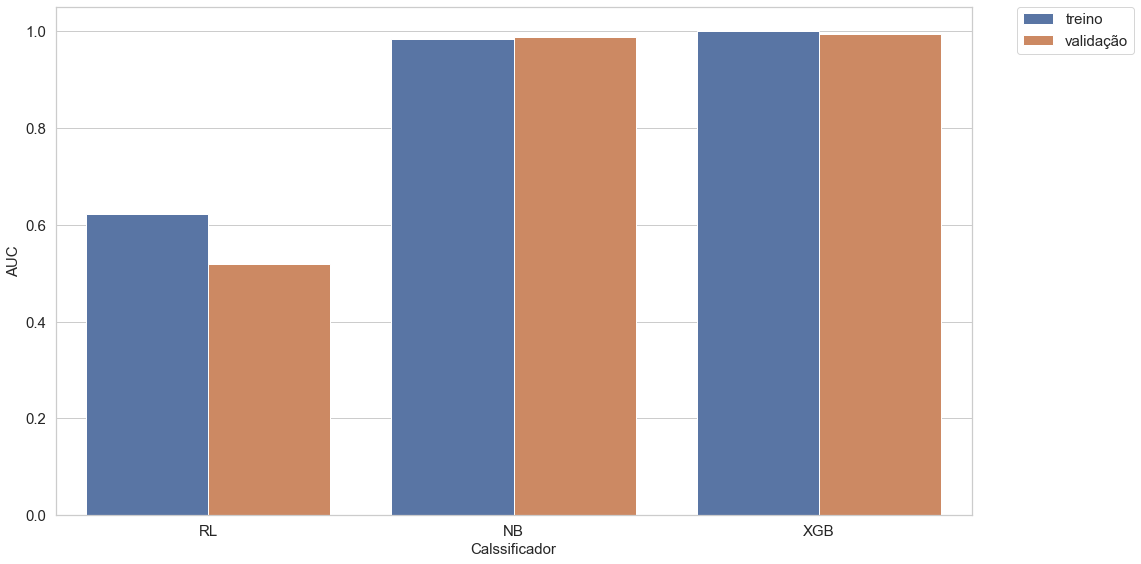

In [91]:
# Construção do Plot
sns.set_style('whitegrid')
plt.figure(figsize=(16, 8))

# Gráfico de barras
ax = sns.barplot(x='classificador', y='auc', hue='data_set', data=df_results)
ax.set_xlabel('Calssificador', fontsize=15)
ax.set_ylabel('AUC', fontsize=15)
ax.tick_params(labelsize=15)

# Legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.tight_layout()

Nosso melhor modelo é o Classificador XGBoost, com um AUC de validação de 99.4%.

### Gravando o melhor modelo

Escolhemos o modelo_v3 simplesmente porque ele tem a AUC de validação mais alta, pois essa é a métrica que escolhemos para avaliar os modelos.

In [92]:
# Grava o modelo em disco
pickle.dump(modelo_v3, open('modelos/melhor_modelo.pkl', 'wb'), protocol=4)

### Avaliando o modelo

In [94]:
# Carrega o modelo, as colunas e o scaler
import pickle
best_model = pickle.load(open('modelos/melhor_modelo.pkl', 'rb'))
cols_input = pickle.load(open('dados/cols_input.sav', 'rb'))
scaler = pickle.load(open('dados/scaler.sav', 'rb'))

# Carrega os dados
import pandas as pd
df_train = pd.read_csv('dados/dados_treino.csv')
df_valid = pd.read_csv('dados/dados_valid.csv')
df_test = pd.read_csv('dados/dados_teste.csv')

# Cria matrizes X e y
## X
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

## y
y_train = df_train['target'].values
y_valid = df_valid['target'].values
y_test = df_test['target'].values

## Aplica a transformação nos dados
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

Calcular as probabilidades de previsão.

In [95]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

Avaliação do desempenho.

In [96]:
thresh = 0.5

print('Modelo Classificador XGBoost')
print('-'*25)
print('TREINAMENTO')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train, y_train_preds, thresh)

print('VALIDAÇÃO')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid, y_valid_preds, thresh)

print('TESTE')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test, y_test_preds, thresh)

Modelo Classificador XGBoost
-------------------------
TREINAMENTO
AUC:		0.999
Acurácia:	0.975
Reccall:	1.000
Precisão:	0.886
Especificidade:	0.968

VALIDAÇÃO
AUC:		0.994
Acurácia:	0.963
Reccall:	0.946
Precisão:	0.883
Especificidade:	0.968

TESTE
AUC:		0.997
Acurácia:	0.973
Reccall:	0.984
Precisão:	0.897
Especificidade:	0.970



Curva ROC.

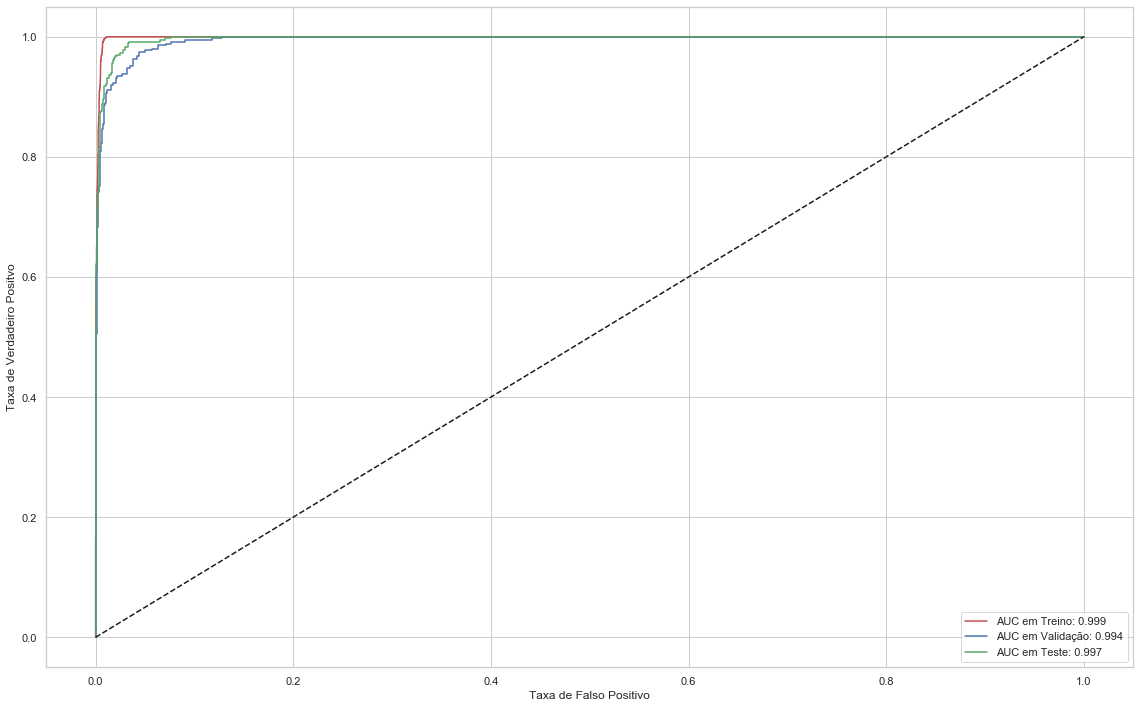

In [103]:
# Importar pacotes
from sklearn.metrics import roc_curve

# Calcula a cirva ROC nos dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calcula a curva ROC nos dados de validação
fpr_valid, tpr_valid, threshold_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot
plt.figure(figsize=(16, 10))
plt.plot(fpr_train, tpr_train, 'r-', label=f'AUC em Treino: {auc_train:.3f}')
plt.plot(fpr_valid, tpr_valid, 'b-', label=f'AUC em Validação: {auc_valid:.3f}')
plt.plot(fpr_test, tpr_test, 'g-', label=f'AUC em Teste: {auc_test:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positvo')
plt.legend()
plt.tight_layout()

## Etapa 6 - Deploy do Modelo

In [114]:
# Carregando dados de um novo paciente
import pandas as pd
novo_paciente = pd.read_csv('dados/novo_paciente.csv')

# Carrega o modelo, as colunas e o scaler
import pickle
best_model = pickle.load(open('modelos/melhor_modelo.pkl', 'rb'))
scaler = pickle.load(open('dados/scaler.sav', 'rb'))

In [115]:
novo_paciente.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,51,43,34,21,13,12,6,4,1,-4,...,-41,-16,2,22,33,45,56,67,69,63


In [116]:
novo_paciente_scaled = scaler.transform(novo_paciente)

In [121]:
best_model.predict_proba(novo_paciente_scaled)

array([[9.9994940e-01, 5.0582115e-05]], dtype=float32)

In [134]:
prob = best_model.predict_proba(novo_paciente_scaled)

print(f'Probabilidade de {prob[0][0]*100:>5.1f}%\tpara classe zero (não está tendo eplepsia)')
print(f'Probabilidade de {prob[0][1]*100:>5.1f}%\tpara classe um (está tendo eplepsia)')

Probabilidade de 100.0%	para classe zero (não está tendo eplepsia)
Probabilidade de   0.0%	para classe um (está tendo eplepsia)


In [118]:
best_model.predict(novo_paciente_scaled)

array([0])

De acordo com os dadso do exame, esse paciente  não terá uma crise epilética.

# Conclusão

Se esse modelo for colocado em produção para prever se um paciente está tendo um crise epilética, você pode esperar que ele tenha um bom desempenho.

---